#### There are news saying Samsung Loses 26 Billion dollars Market Value Due To “Exploding” Galaxy 7 Smartphones. Although I know nothing about finance and stocks, I use yahoo finance api to crawl the stock data of Samsung trying to see if the company was blowed by this event.

In [1]:
import matplotlib.pyplot as pl
import numpy as np
import urllib
import matplotlib.dates as mdates
import seaborn

In [92]:
def bytespdate2num(fmt, encoding = 'utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    
def graph_data(stock):
    
    fig = pl.figure(figsize = (10,6))
    ax1 = pl.subplot2grid((1,1), (0,0))
    
    
    stock_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/' + stock + '/chartdata;type=quote;range=1y/csv'
    source_code = urllib.request.urlopen(stock_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'value' not in line and 'labels' not in line:
                stock_data.append(line)
                
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter = ',',
                                                         unpack = True,
                                                          # %Y = full year 2016
                                                          # %y = partial year 16
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2016
                                                          # %m-%d-%Y
                                                         converters = {0: bytespdate2num('%Y%m%d')})
    
    ax1.plot_date(date, closep, '-', color = '#37BCE6', linewidth=1)
    ax1.fill_between(date, closep, alpha = 0.2, color = '#B8F8FA')
    ax1.patch.set_facecolor('#FCFCFC')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True, color = '#E8E7E7',linewidth = 0.3) #linestyle = '-'    
    #ax1.xaxis.label.set_color('c')
    #ax1.yaxis.label.set_color('r')
    #ax1.set_yticks()
    ax1.set_ylim(1000000,1800000)
    
    pl.xlabel('Date')
    pl.ylabel('Closing Price(currency:KRW)')
    pl.title('Samsung Stock Closing Prices for the Past Year', fontsize = 16, fontweight='bold')
    #pl.legend()
    #pl.subplots_adjust(left = 0.09, bottom = 0.20, right = 0.94, top = 0.90, wspace = 0.2, hspace = 0)
    pl.show()
    

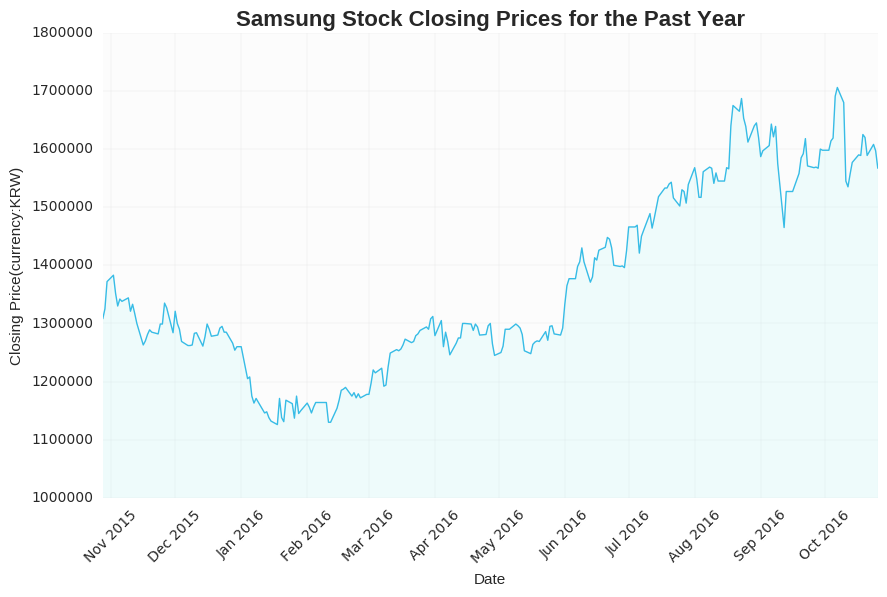

In [93]:
# SAMSUNG ELECTRONICS CO
graph_data('005930.KS')

### Figure1: figure shows the closing price of Samsung Electronics for the last year. It seems its market value has been rising as this year goes. There are several decline of prices at the recent months, could be causing by the recalls of the smartphones. Maybe taking a closer look at the market prices for the recent years would be a better choice.